# Iris dataset

In [22]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Read data
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Shuffle the data
df = df.sample(frac=1, random_state=0)

# Extract X and y
X = df.iloc[:, 0:4].values
y = df["target"].values

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4,)),
    tf.keras.layers.Dense(units=16, activation='sigmoid', name='hidden1'),
    tf.keras.layers.Dense(units=3, name='output', activation='softmax')
    ])

model.summary()

adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                80        
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
tf_fit = model.fit(x=X_train_std, y=y_train,
        batch_size=16,
        validation_split=0.2,
        epochs=400, 
        verbose=1)

Epoch 1/400


6/6 [==============================] - 1s 31ms/step - loss: 1.2648 - accuracy: 0.3095 - val_loss: 1.1456 - val_accuracy: 0.4286
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 1.2348 - accuracy: 0.3095 - val_loss: 1.1243 - val_accuracy: 0.4286
Epoch 3/400
6/6 [==============================] - 0s 8ms/step - loss: 1.2042 - accuracy: 0.3095 - val_loss: 1.1045 - val_accuracy: 0.4286
Epoch 4/400
6/6 [==============================] - 0s 8ms/step - loss: 1.1770 - accuracy: 0.3095 - val_loss: 1.0865 - val_accuracy: 0.4286
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 1.1534 - accuracy: 0.3095 - val_loss: 1.0700 - val_accuracy: 0.4286
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 1.1301 - accuracy: 0.3095 - val_loss: 1.0549 - val_accuracy: 0.4286
Epoch 7/400
6/6 [==============================] - 0s 7ms/step - loss: 1.1097 - accuracy: 0.3214 - val_loss: 1.0406 - val_accuracy: 0.4286
Epoch 8/400
6/6 [=====================

In [26]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.264774,0.309524,1.145623,0.428571
1,1.234826,0.309524,1.124308,0.428571
2,1.204244,0.309524,1.104519,0.428571
3,1.177029,0.309524,1.086504,0.428571
4,1.153407,0.309524,1.069973,0.428571


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

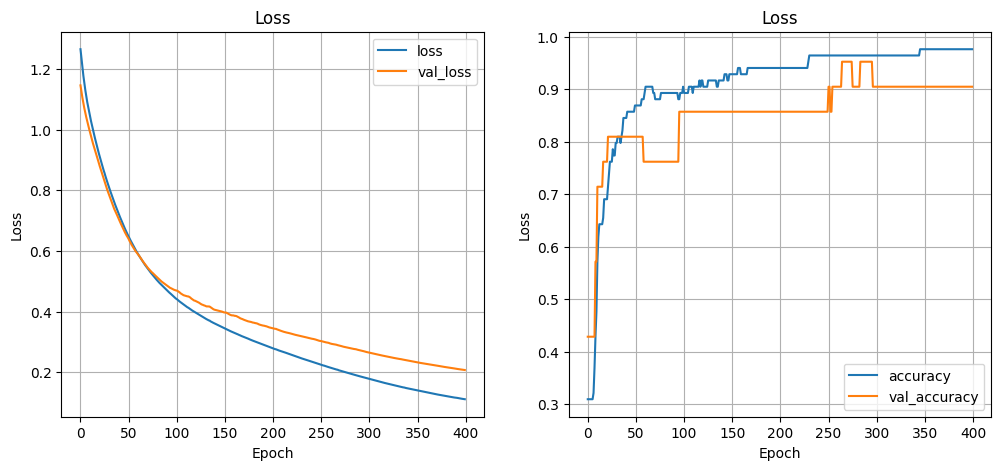

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [28]:
results = model.evaluate(X_test_std, y_test, verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.1452   Test Acc.: 0.9556
